# Ames Housing Price Predictions.

# Part 1 - Introduction and Data Description

We will use Ames Housing data set. A marketing campaign in the past has obtained data pertaining to all the houses that were sold in the Ames region in the USA, which includes 80 different features describing the house's size, location, various amenities offered and so on. The Ames housing wants to develop its future strategies based on the insights that it will draw and improve its planning accordingly.

In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframe
import numpy as np
import pandas as pd

# Import 'matplotlib' and 'seaborn' for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Import methods for 'train_test_split' and 'StandardScaler'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import methods to study model performance
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import packages to build different models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression

# Import 'GridSearchCV' for hyperparamter tuning.
from sklearn.model_selection import GridSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
pd.set_option('display.max_columns', 90)
housing_df = pd.read_csv("ames_data_no_missing.csv", index_col = 0)

In [3]:
# Show First five rows of the dataset.
housing_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960,Fin,2,528,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,None,Reg,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Gd,TA,CBlock,TA,TA,No,ALQ,1065,Unf,0,1045,2110,GasA,Ex,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968,Fin,2,522,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,189900


In [4]:
# Show the number of dummies to be created 
count = [housing_df[col].nunique() for col in housing_df.columns if housing_df[col].dtype == object]
print("Total number of dummies to be created =",sum(count))

Total number of dummies to be created = 279


In [5]:
# Ensure Python reads Categorical variables as categorical
for column in housing_df.columns:
    if housing_df[column].dtype == 'object':
        housing_df[column] = pd.Categorical(housing_df[column])

In [6]:
# Define RMSE function
def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

# Task 1 : Understand the data.
### Task 1.1:-
- **What is the distribution of housing prices? Given this distribution, would it be appropriate to use a single model to predict salaries for houses, or should we possibly subset that data? Are there any variable transformations that would be potentially useful to apply?**

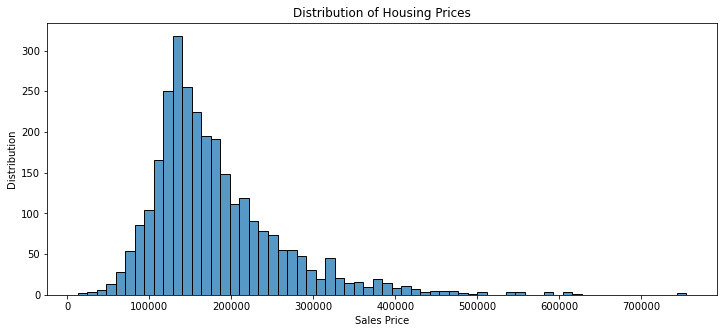

In [7]:
# Determine the distribution of housing price.
plt.figure(figsize=(12, 5))
ax = sns.histplot(data=housing_df['SalePrice'])
ax.set_title("Distribution of Housing Prices")
ax.set_xlabel("Sales Price")
ax.set_ylabel("Distribution")
plt.show()

### Observations:- 
- **Considering the long-tail at the higher end of the distribution, we consider a log scale, which indeed takes a more normal and symmetric distribution.**

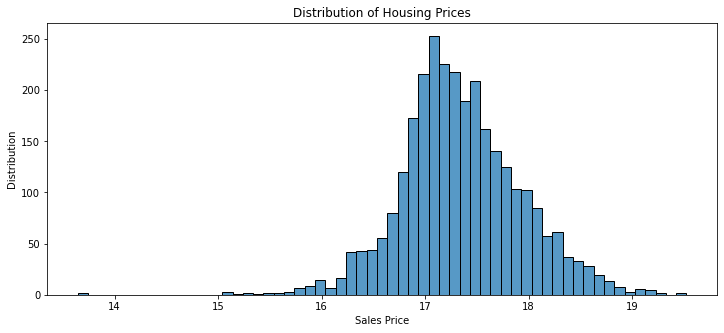

In [8]:
# Plot above histogram plot with log-10 distribution
plt.figure(figsize=(12, 5))
ax = sns.histplot(np.log2(housing_df['SalePrice']))
ax.set_title("Distribution of Housing Prices")
ax.set_xlabel("Sales Price")
ax.set_ylabel("Distribution")
plt.show()

### Observations:- 
- **Considering the long-tail at the higher end of the distribution, which contains slight normal distribution curve.**

### Task 1.2
- **Which variable has the highest correlation with housing prices? What are the key drivers behind larger house prices?**

In [9]:
# Find the correlation for all variables with SalePrice.
corr_df = pd.DataFrame(housing_df.corr()['SalePrice'].sort_values(ascending=False).reset_index())

# Determine the variables that has significant correlation with SalePrice.
corr_df.columns = ['Column', 'Correlation']
corr_df = corr_df[corr_df['Column'] != 'SalePrice']
corr_df

,Column,Correlation
1,Overall Qual,0.799262
2,Gr Liv Area,0.706780
3,Garage Cars,0.647562
4,Garage Area,0.640138
5,Total Bsmt SF,0.632529
6,1st Flr SF,0.621676
7,Year Built,0.558426
8,Full Bath,0.545604
9,Year Remod/Add,0.532974
10,Mas Vnr Area,0.502196


### Observations:- 
- **We see that housing quality, square footage and Garage cars square feet all are strongly correlated with housing prices and likely are key drivers of higher prices.**

### Task 1.3
- **Create one additional visualization that provides some insights into the data.**

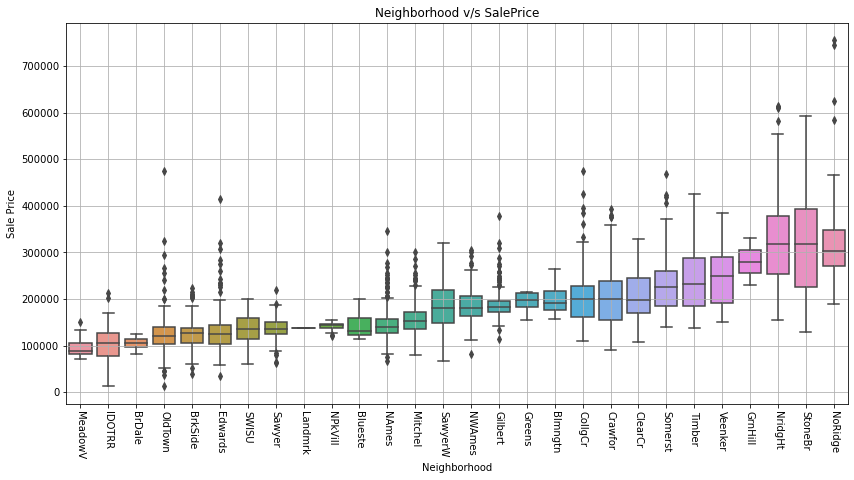

In [10]:
# Create a visualization for the distribution of sale price for each neighborhood
# Sorting neighborhoods by their mean sale price.
neighborhood = housing_df.groupby('Neighborhood')[['SalePrice']].mean().sort_values(by='SalePrice')

# Create a boxplot of SalePrice distribution of each neighborhood
ax = plt.figure(figsize=(14, 7))
ax = sns.boxplot(data=housing_df, x='Neighborhood', y='SalePrice', order = list(neighborhood.index))
ax.set_title("Neighborhood v/s SalePrice")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Sale Price")
plt.xticks(rotation=270)
plt.grid()
plt.show()

# Task 2: Build Machine learning models.

## Task 2.1:- 
- **Store the predictors and the target variable in variables X and y.**
- **Create the dummy variables for categorical columns.**
- **Split the data into train and test sets (70-30 split with random state 0).**
- **Scale the numerical columns using StandardScaler.**

In [11]:
# Initialize target and input variable for the dataset.
X = housing_df.drop(columns=['SalePrice'])
y = housing_df['SalePrice']

# Use dummy variables for categorical variables.
X1 = pd.get_dummies(X, drop_first=False)  # For kNN and Trees  
X2 = pd.get_dummies(X, drop_first=True)  # For Linear Regression

# Split the data into training and validation data.
X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(X1, X2, y, test_size=0.3, random_state=0)

# Scale the training and validation dataset for numerical variables
scaler = StandardScaler()
numeric_cols = [col for col in X.columns if X[col].dtypes.name != 'category']

X1_train[numeric_cols] = scaler.fit_transform(X1_train[numeric_cols])
X1_val[numeric_cols] = scaler.transform(X1_val[numeric_cols])

X2_train[numeric_cols] = scaler.fit_transform(X2_train[numeric_cols])
X2_val[numeric_cols] = scaler.transform(X2_val[numeric_cols])

## Task 2.2:- Build a linear regression model, a regression tree, and a k-NN model.
- Carefully apply regularization to the linear regression model.
- For k-NN, having a high number of features may be detrimental to the model-building process. For this reason, carefully select the variables you will use for the k-NN model. Hint: This can be done by identifying the features which are most correlated with the target variable (or dependent variable). For example, you can only choose the top 20 most correlated features and build the k-NN model using only these 20 features.
- Summarize the predictive performance in terms of RMSE.
- Study the largest errors that you made. What may be some of the reasons why the model is over/under-predicting? Will these insights possibly help you improve the models?

In [12]:
# Build a linear model using LassoCV to get the best LASSO model.
# Iterate over a wide range of alphas.
# Choose a large value for the maximum iteration to get robust result.

alphas = np.arange(.01, 500, 10)
lasso_cv_grid = LassoCV(alphas=alphas, cv=5, max_iter = 1000000)
lasso_cv_grid.fit(X2_train, y_train)
print(lasso_cv_grid.alpha_)

# Fit the best lasso alpha value.
lin_reg_best = Lasso(alpha=lasso_cv_grid.alpha_)
lin_reg_best.fit(X2_train, y_train)

230.01


Lasso(alpha=230.01)

### Create one additional Regression Tree model 

In [13]:
# Build a tree model using max depth to control the complexity of the tree.
# Also run a Grid Search for multiple values of max depth.
param_grid = {'max_depth':np.arange(1, 20)}
grid = GridSearchCV(DecisionTreeRegressor(),
                    param_grid = param_grid,
                    cv = 5,
                    scoring = 'neg_mean_squared_error')
grid_search = grid.fit(X1_train, y_train)
print("The minimum RMSE is obtained at max depth of :", grid_search.best_params_['max_depth'])

# Build a Tree regression model using the max depth obtained from grid search.
tree_reg_best = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'])
tree_reg_best.fit(X1_train, y_train)

The minimum RMSE is obtained at max depth of : 9


DecisionTreeRegressor(max_depth=9)

### Alternative Tree model

In [14]:
# Build a tree model
tree_reg = DecisionTreeRegressor(random_state=0)
path = tree_reg.cost_complexity_pruning_path(X1_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a regression tree model for each alpha value and store it in a list
regs = []

for ccp_alpha in ccp_alphas:
    # Train a model with a value from the list of ccp_alphas
    curr_reg = DecisionTreeRegressor(random_state=0, ccp_alpha = ccp_alpha)
    curr_reg.fit(X1_train, y_train)
    # Add model to the list of models
    regs.append(curr_reg)
    
# Create a list to store accuracy values for the validation dataset.
val_rmse = []

# Iterate over the list of models
for r in regs:
    y_val_pred = r.predict(X1_val)
    
    # Append the accuracy values for the training and validation datasets to our list
    val_rmse.append(rmse(y_val_pred, y_val))
    
# Find the value of ccp_alpha for which the validation rmse is the lowest
best_ccp_alpha = ccp_alphas[val_rmse.index(min(val_rmse))]
print("Best CCP Alpha : %.3f " %(best_ccp_alpha))

# Train a decision tree with the best ccp alpha
best_tree_reg = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha, random_state=0)
best_tree_reg.fit(X1_train, y_train)

Best CCP Alpha : 47673967.930 


DecisionTreeRegressor(ccp_alpha=47673967.92979123, random_state=0)

### Task 2.2.2:- kNN model

In [15]:
# Selecting the top 20 most correlated features(using similar correlation from task 1)
top_20_features = list(corr_df.loc[:20]['Column'])

# Initialize the parameter grid of different values of k
param_grid = {'n_neighbors': np.arange(1,21)}

# Initialize the GridSearchCV for a kNN regressor
grid = GridSearchCV(KNeighborsRegressor(),
                   param_grid,
                   cv = 5,
                   scoring = 'neg_mean_squared_error',
                   return_train_score = False)

# Fitting the model into the training data
grid_search = grid.fit(X1_train[top_20_features], y_train)

# Display the value of k for which RMSE is minimum
print("The minimum RMSE is obtained at k =", grid_search.best_params_['n_neighbors'])

# Re-fit the Knn model using the k-value obtained above to get the best kNN model
knn_reg_best = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_reg_best.fit(X1_train[top_20_features], y_train)

The minimum RMSE is obtained at k = 8


KNeighborsRegressor(n_neighbors=8)

### Task 2.2.3:- 

In [16]:
# Calculate RMSE performance measures for each models
# Linear Regression model.
lin_train_rmse = rmse(y_train, lin_reg_best.predict(X2_train))
lin_val_rmse = rmse(y_val, lin_reg_best.predict(X2_val))

# Max Depth pruned tree model.
tree_train_rmse = rmse(y_train, tree_reg_best.predict(X1_train))
tree_val_rmse = rmse(y_val, tree_reg_best.predict(X1_val))

# kNN model.
knn_train_rmse = rmse(y_train, knn_reg_best.predict(X1_train[top_20_features]))
knn_val_rmse = rmse(y_val, knn_reg_best.predict(X1_val[top_20_features]))

pd.DataFrame([[lin_train_rmse, lin_val_rmse], [tree_train_rmse, tree_val_rmse], 
              [knn_train_rmse, knn_val_rmse]], columns=['RMSE Train', 'RMSE Val'], 
              index=['Linear Regression', 'Tree', 'kNN'])

,RMSE Train,RMSE Val
Linear Regression,24393.575191,34322.625033
Tree,13661.486745,40166.759548
kNN,26043.622766,34928.981123


### Task 2.2.4

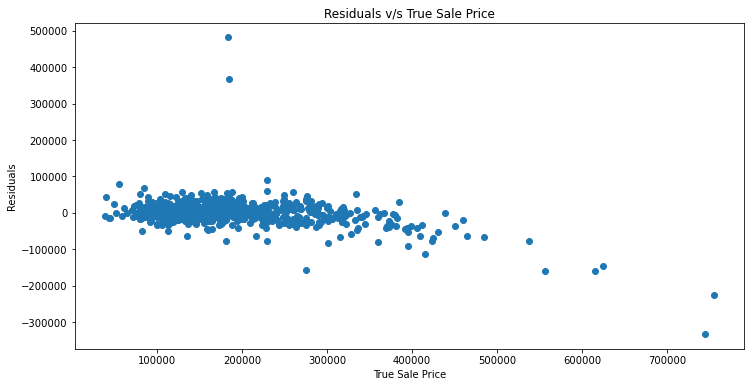

In [17]:
# Visualize the largest errors (residuals)
# Build a scatterplot of the residuals v/s SalePrice

resid = lin_reg_best.predict(X2_val) - y_val
plt.figure(figsize=(12, 6))
plt.plot(y_val, resid, 'o')
plt.xlabel("True Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals v/s True Sale Price")
plt.show()

### Observations:-
- **We can look the two outleirs where prices are high and two outleirs with low price and high residuals.**
- **Let's check where the model is overpredicting.**

In [18]:
# Checking the two outleirs where prices is high.
X2_val[(resid < -2500000) & (y_val < 700000)]

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_None,Alley_Pave,...,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_None,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


# Task 3:- Improve your machine learning models
### Task 3.1
- **Data Transformation: You can also build a linear regression model between the independent variables and the log of the dependent variable. Are you able to improve your linear regression model by taking the log of the dependent variable? (Remember to translate your predicted target variable back to the original units before calculating the RMSE.) You are required to build only the LASSO model for this task.**

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

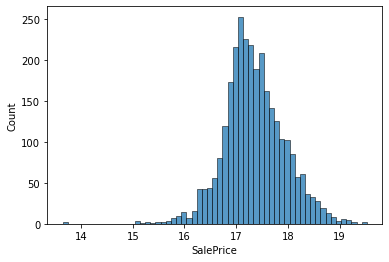

In [19]:
# The log-10 distribution
sns.histplot(np.log2(housing_df['SalePrice']))
plt.show()

In [20]:
# Linear model - Using the log of the SalePrice as the dependent variable, run the LassoCV to obtain the best LASSO model
alphas = np.arange(.0001, .1, .0001)
lasso_cv_grid = LassoCV(alphas=alphas, cv=5, max_iter=1000000)
lasso_cv_grid.fit(X2_train, np.log2(y_train))
print(lasso_cv_grid.alpha_)

lin_reg_best_log = Lasso(alpha=lasso_cv_grid.alpha_)
lin_reg_best_log.fit(X2_train, np.log2(y_train))

# Calculate RMSE values for training and validation data
lin_train_rmse = rmse(y_train, 2 ** lin_reg_best_log.predict(X2_train))
lin_val_rmse = rmse(y_val, 2** lin_reg_best_log.predict(X2_val))

# Display the RMSE values in a dataframe.
pd.DataFrame([[lin_train_rmse, lin_val_rmse]], columns=['RMSE Train', 'RMSE Val'],
            index=['Linear'])

0.0015


,RMSE Train,RMSE Val
Linear,30711.128391,52878.214542


### Task 3.2 Bonus Task
- **Experiment with data segmentation: Should you subset the data and fit separate models for each subset? Experiment with the feature HouseStyles and select the top 3 HouseStyles to build separate models. You are required to build only the LASSO model for this task.**

In [21]:
housing_df['House Style'].value_counts()

1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [22]:
# Create a matrix for the subset of data.
matrix = []
styles = ['1Story', '2Story', '1.5Fin']
for style in styles:
    curr_style = []
    for bedroom in range(1,6):
        curr_mean = housing_df[(housing_df['House Style'] == style)]['SalePrice'].mean()
        
        curr_style.append(curr_mean)
    matrix.append(curr_style)

In [23]:
# Linear Segmentation Model - Train a lasso model for the individual subset of styles - '1Story', '2Story', '1.5Fin'
# For each style, extract X and y from the training and validation set whose house style is that specific style
# Train a lasso model - Get the optimal alpha and define the best model - Find the rmse.

rmse_table_ds = []
for style in styles:
    curr_row = []
    curr_X_train = X2_train.loc[housing_df['House Style'] == style]
    curr_y_train = y_train.loc[housing_df['House Style'] == style]
    curr_X_val = X2_val.loc[housing_df['House Style'] == style]
    curr_y_val = y_val.loc[housing_df['House Style'] == style]
    
    # Train a lasso model for the individual subset of the data
    # Linear model data segmentation (DS)
    alphas = np.arange(.01, 250, 10)
    lasso_cv_grid = LassoCV(alphas=alphas, cv=5, max_iter=2000000)
    lasso_cv_grid.fit(curr_X_train, curr_y_train)
    print(lasso_cv_grid.alpha_)
    
    # Use the alpha obtained for optimal performance and re-fit the model on the training dataset.
    lin_reg_best_ds = Lasso(alpha = lasso_cv_grid.alpha_)
    lin_reg_best_ds.fit(curr_X_train, curr_y_train)
    
    # Find and store the training and validation RMSE obtained
    lin_train_rmse = rmse(curr_y_train, lin_reg_best_ds.predict(curr_X_train))
    lin_val_rmse = rmse(curr_y_val, lin_reg_best_ds.predict(curr_X_val))
    curr_row += [lin_train_rmse, lin_val_rmse]
    
    rmse_table_ds.append(curr_row)

50.01
60.01
240.01


In [24]:
# Create a DataFrame to store the values of RMSE on the train and validation sets on all the 3 subsets of data
pd.DataFrame(rmse_table_ds, columns=['DS RMSE Train', 'DS RMSE Val'],
            index=[styles])

,DS RMSE Train,DS RMSE Val
1Story,19415.349051,36629.635830
2Story,16309.045391,43037.141265
1.5Fin,13595.637881,18645.383891


# Task 4:- Summarize your findings.
Now, take some time to translate your results into valuable insights. Specifically, you should address the following:

What drives housing prices?
What is the predictive performance of your models?
How reliable are your predictions?

In [25]:
# Visualize all the columns and their coefficients sorted in descending order to understand the ones that has the most say in the SalePrice
coef_df = pd.DataFrame(dict(zip(X2.columns, lin_reg_best.coef_)).items(), columns = ['Column', 'Coefficient'])
coef_df.sort_values(by='Coefficient', ascending=False)[:20].set_index('Column')

,Coefficient
Column,
Neighborhood_StoneBr,29032.767795
Neighborhood_NoRidge,24098.102810
Neighborhood_NridgHt,23256.551156
Gr Liv Area,21972.389309
Overall Qual,18038.314165
Bsmt Exposure_Gd,12895.292815
Sale Type_New,11273.624886
Exterior 1st_BrkFace,9752.735822
Year Built,9415.597225


In [26]:
lin_reg_best
lasso_coef = np.transpose(np.append(lin_reg_best.intercept_, lin_reg_best.coef_))
coef_names = ['const'] + list(X2.columns)
coef_table = pd.concat([pd.DataFrame(coef_names), pd.DataFrame(lasso_coef)], axis=1)
coef_table.columns = ['', 'Coefficient']
coef_table.set_index('', inplace=True)
coef_table.sort_values(by='Coefficient', ascending=False, inplace=True)
coef_table.iloc[:20]

,Coefficient
,
const,193825.370805
Neighborhood_StoneBr,29032.767795
Neighborhood_NoRidge,24098.102810
Neighborhood_NridgHt,23256.551156
Gr Liv Area,21972.389309
Overall Qual,18038.314165
Bsmt Exposure_Gd,12895.292815
Sale Type_New,11273.624886
Exterior 1st_BrkFace,9752.735822


**We can use a built in variable importance function from decision trees to capture a summary of the importance of different features in our regression tree.**

In [27]:
features = X.columns.tolist()

In [28]:
# Extracting the importance by sklearn
importances_sk = tree_reg_best.feature_importances_

# Creating a dataframe with the feature importance by sklearn.
feature_importance_df = []
for i, feature in enumerate(X1_train.columns):
    feature_importance_df.append([feature, round(importances_sk[i],3)])
    
feature_importance_df  = pd.DataFrame(feature_importance_df,
                                     columns = ['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(f"Feature Importance by sklearn: ")
feature_importance_df.iloc[:20]

Feature Importance by sklearn: 


,Feature,Importance
0,Overall Qual,0.711
1,Gr Liv Area,0.102
2,1st Flr SF,0.034
3,Total Bsmt SF,0.030
4,BsmtFin SF 1,0.018
5,Garage Area,0.017
6,Lot Area,0.015
7,Year Built,0.010
8,Garage Yr Blt,0.005
9,Roof Style_Hip,0.004


### 4.2:- What is the predictive performance of your models?

- The predictive performance of our models was generally in the range **12000-44000 RMSE**.
- However, we saw before the performance got worse in the basic model as $SalePrice$ increased and got further from the median $SalePrice$.

### Task 4.3 :- How reliable are your predictions?

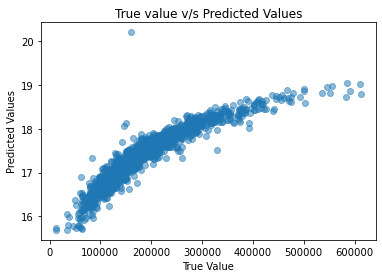

In [29]:
# Plot a scatterplot of the predicted vs the true value of the SalePrice
# Using the optimized linear regression model and trained on the log scale of y
plt.plot(y_train, lin_reg_best_log.predict(X2_train), 'o', alpha=0.5)
plt.xlabel("True Value")
plt.ylabel("Predicted Values")
plt.title("True value v/s Predicted Values")
plt.show()

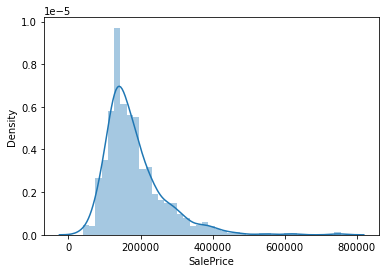

In [30]:
# Plot a histogram of the residuals
# Use the optimized linear Regression model and train on the log scale of y
sns.distplot(np.abs(y_val, 2**lin_reg_best_log.predict(X2_val)))
plt.show()